### Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [4]:
df_house = pd.read_csv('House_Rent_Dataset (2).csv')
df_house.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### Data Cleaning

In [6]:
print('NaN values in Water dataset:')
df_house.isna().sum()

NaN values in Water dataset:


Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [8]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


### Feature Selection

In [11]:
df_clean = df_house.iloc[:, 1:-1]
df_clean.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1


### Label Encoding

In [22]:
df_object = df_clean.select_dtypes('object')

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
for col in list(df_object.columns):
    df_object[col] = le.fit_transform(df_object[col])

In [32]:
df_clean[['Floor', 'Area Type','Area Locality','City','Furnishing Status','Tenant Preferred']] = df_object

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   BHK                4746 non-null   int64
 1   Rent               4746 non-null   int64
 2   Size               4746 non-null   int64
 3   Floor              4746 non-null   int64
 4   Area Type          4746 non-null   int64
 5   Area Locality      4746 non-null   int64
 6   City               4746 non-null   int64
 7   Furnishing Status  4746 non-null   int64
 8   Tenant Preferred   4746 non-null   int64
 9   Bathroom           4746 non-null   int64
dtypes: int64(10)
memory usage: 370.9 KB


<Axes: >

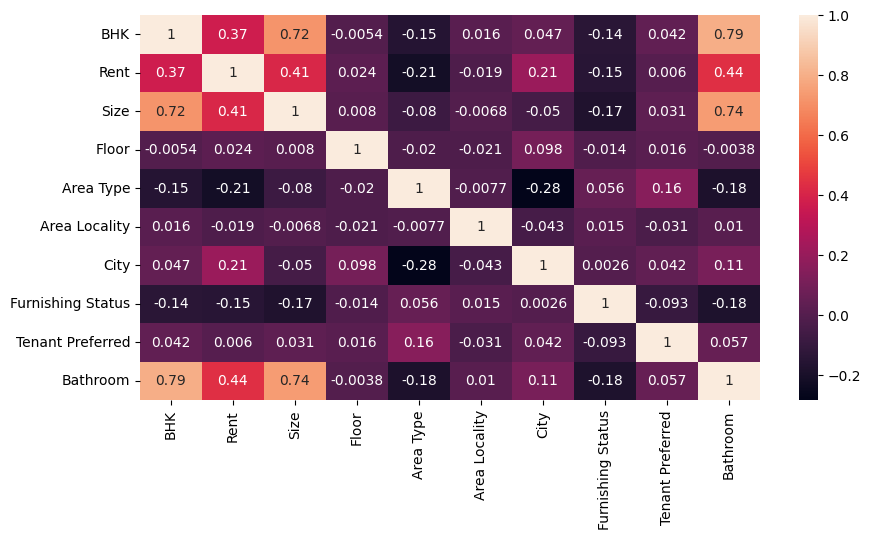

In [35]:
plt.figure(figsize = (10, 5))
sns.heatmap(df_clean.corr(), annot = True)

In [43]:
col_list

['BHK',
 'Rent',
 'Size',
 'Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Bathroom']

In [37]:
col_list = list(df_clean.columns)

In [46]:
col_list[2:]

['Size',
 'Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Bathroom']

In [53]:
final_list = [i for i in col_list if i != 'Rent']

In [55]:
x = df_clean[final_list]

In [54]:
y = df_clean['Rent']

In [57]:
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

### Data Splitting

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [59]:
print('No of records in traning data:', x_train.shape[0])
print('No of records in testting data:', x_test.shape[0])

No of records in traning data: 3796
No of records in testting data: 950


### Model Building

In [63]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('MAE:' ,mean_absolute_error(y_test, pred))

MAE: 24410.209707601116


In [64]:
from sklearn.svm import SVR
model2 = SVR()
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
print('MAE:' ,mean_absolute_error(y_test, pred2))

MAE: 24207.49251292466


In [81]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(max_features=5)
model3.fit(x_train, y_train)
pred3 = model3.predict(x_test)
print('MAE:' ,mean_absolute_error(y_test, pred3))

MAE: 13387.799266666669


In [66]:
max(y_test)

1200000

In [67]:
min(y_test)

1800

In [69]:
np.mean(y_test)

np.float64(34361.85684210526)

In [84]:
sample = x_test.loc[538]

In [85]:
model3.predict([sample])

C:\Users\kamra\anaconda3\envs\NumPY\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([43480.])

In [86]:
df_clean.loc[538]

BHK                      2
Rent                 28000
Size                   518
Floor                  333
Area Type                1
Area Locality          287
City                     5
Furnishing Status        1
Tenant Preferred         1
Bathroom                 2
Name: 538, dtype: int64